## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape

(50000, 3072)

In [6]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
Dropout_EXP = [0.2, 0.4]
Opitimzer = [keras.optimizers.SGD, keras.optimizers.Adam]

In [8]:
results = {}
for drp_rate in Dropout_EXP :
    for opt in Opitimzer:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_rate)
        model.summary()
        optimizer = opt(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-drp_rate-%s-opt-%s" % (str(drp_rate), str(opt))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 54us/step - loss: 2.0987 - acc: 0.2104 - val_loss: 1.9316 - val_acc: 0.2847
Epoch 2/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.9183 - acc: 0.2928 - val_loss: 1.8044 - val_acc: 0.3515
Epoch 3/30
50000/50000 [==============================] - 2s 45us/step - loss: 1.8470 - acc: 0.3303 - val_loss: 1.7486 - val_acc: 0.3727
Epoch 4/30
50000/50000 [==============================] - 2s 45us/step - loss: 1.8016 - acc: 0.3464 - val_loss: 1.6933 - val_acc: 0.3978
Epoch 5/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.7689 - acc: 0.3590 - val_loss: 1.6657 - val_acc: 0.4044
Epoch 6/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.7298 - acc: 0.3754 - val_loss: 1.6810 - val_acc: 0.4169
Epoch 7/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.7165 - acc: 0.3794 - val_loss: 1.6113 - val_acc

Epoch 18/30
50000/50000 [==============================] - 2s 39us/step - loss: 2.2531 - acc: 0.1558 - val_loss: 2.2141 - val_acc: 0.2246
Epoch 19/30
50000/50000 [==============================] - 2s 38us/step - loss: 2.2507 - acc: 0.1552 - val_loss: 2.2073 - val_acc: 0.2250
Epoch 20/30
50000/50000 [==============================] - 2s 38us/step - loss: 2.2461 - acc: 0.1613 - val_loss: 2.1996 - val_acc: 0.2305
Epoch 21/30
50000/50000 [==============================] - 2s 38us/step - loss: 2.2408 - acc: 0.1618 - val_loss: 2.1922 - val_acc: 0.2309
Epoch 22/30
50000/50000 [==============================] - 2s 38us/step - loss: 2.2366 - acc: 0.1622 - val_loss: 2.1851 - val_acc: 0.2307
Epoch 23/30
50000/50000 [==============================] - 2s 38us/step - loss: 2.2281 - acc: 0.1671 - val_loss: 2.1772 - val_acc: 0.2332
Epoch 24/30
50000/50000 [==============================] - 2s 39us/step - loss: 2.2222 - acc: 0.1697 - val_loss: 2.1684 - val_acc: 0.2394
Epoch 25/30
50000/50000 [=========

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_model_score(results):
    color_bar = ["r", "g", "b", "y", "m", "k"] 
    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

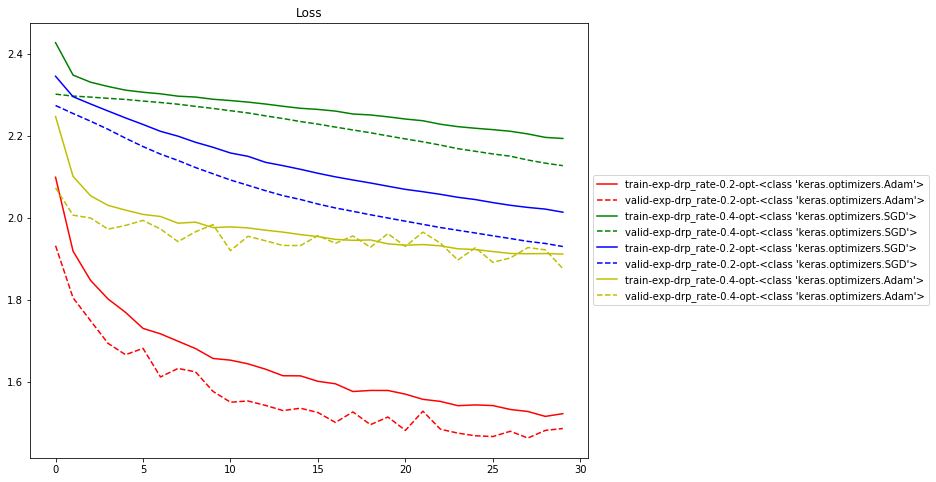

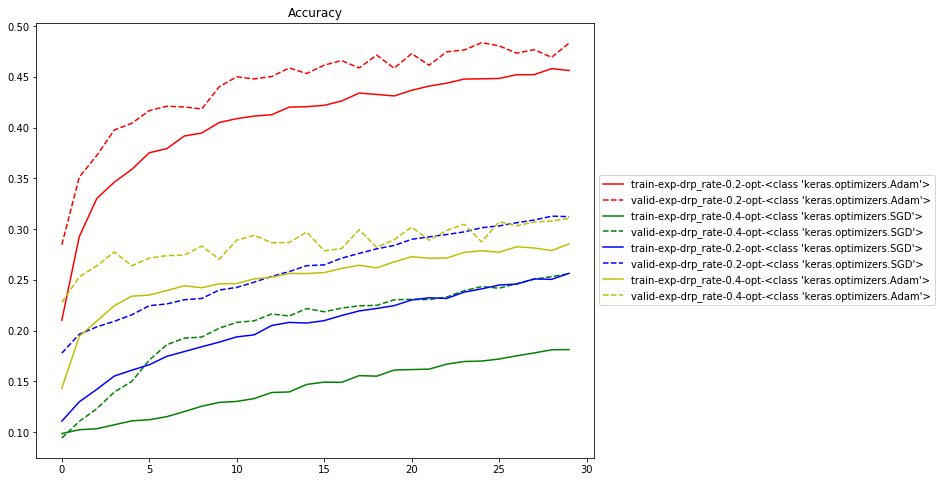

In [10]:
plot_model_score(results)